In [28]:
from prettytable import PrettyTable
import os
import matplotlib.pyplot as plt

# TPC1: Análise de dados: doença cardíaca

Descarregue o ficheiro de dados: `myheart.csv`
Crie um programa em Python, conjunto de funções, que responda às seguintes questões:
* Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;
* Pense num modelo para guardar uma distribuição;
* Crie uma função que calcula a distribuição da doença por sexo;
* Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...
* Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior;
* Crie uma função que imprime na forma de uma tabela uma distribuição;
* Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas;
* Extra: explore o módulo matplotlib e crie gráficos para as suas distribuições.

#### Pense num modelo para guardar uma distribuição

In [29]:
d = dict()
# head[0] = age, head[1] = sexo, head[2] = tensão, head[3] = colesterol, head[4] = batimento, head[5] = temDoença
d = {'idade': [], 'sexo': [], 'tensão': [], 'colesterol': [], 'batimento': [], 'temDoença': []}

#### Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória

In [30]:
def getInfo(d):
    # Crie uma função que lê a informação do ficheiro para um modelo, previamente pensado em memória;
    f = open("myheart.csv", "rt")

    # content = idade,sexo,tensão,colesterol,batimento,temDoença
    content = f.readline()
    # head[0] = idade, head[1] = sexo, head[2] = tensão, head[3] = colesterol, head[4] = batimento, head[5] = temDoença
    head = content.replace("\n","").split(",")

    for line in f:
        l = line.split(",")
        d[head[0]].append(l[0])
        d[head[1]].append(l[1])
        d[head[2]].append(l[2])
        d[head[3]].append(l[3])
        d[head[4]].append(l[4])
        d[head[5]].append(l[5].replace("\n",""))

    f.close()

getInfo(d)

# verifica as pessoas que contêm a doença
haveDisease = []
i = 0
for dead in d['temDoença']:
    if dead == "1":
        haveDisease.append(i)
    i += 1
haveDiseaseNumber = len(haveDisease)

#### Crie uma função que imprime na forma de uma tabela uma distribuição

In [31]:
def createTable(distDict):
    t = PrettyTable()

    t.field_names = ["Range", "Distribution"]
    
    tupleDict = []
    for i in distDict.keys():
        tupleDict.append([i, distDict[i]])

    tupleDict.sort(key=lambda x: x[0])
    
    for row in tupleDict:
        t.add_row(row)
        
    print(t)

#### Explore o módulo matplotlib e crie gráficos para as suas distribuições

In [32]:
def createGraph(data, title, xlabel):
    xValues = list(data.keys())
    yValues = list(data.values())
    
    # plt.bar(xValues, yValues)
    # plt.title(title)
    # plt.xlabel(xlabel)
    # plt.ylabel("Probability")
    # plt.show()
    # plt.tight_layout(pad=3)

    fig, ax = plt.subplots()

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Probability')
    ax.bar(xValues, yValues)

    # set the x-tick labels with more space between them
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data.keys(), rotation=45, ha='right')

    # add padding to the bottom of the plot
    plt.tight_layout(pad=3)

    # display the graph
    plt.show()

    
    

#### Crie uma função que calcula a distribuição da doença por sexo

+-------+--------------+
| Range | Distribution |
+-------+--------------+
|   F   |     0.09     |
|   M   |     0.91     |
+-------+--------------+


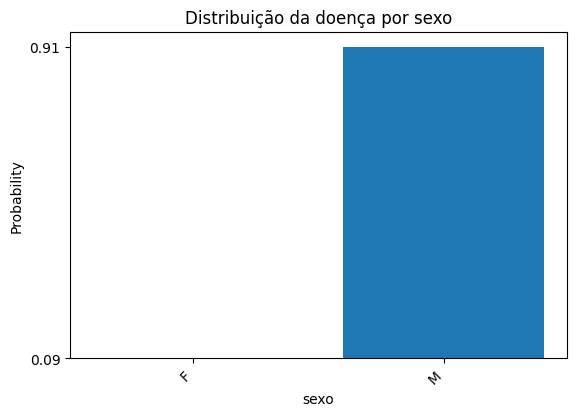

In [33]:
def sexFunc(d,haveDiseaseNumber):
    # calcula distribuições por sexo
    haveDiseaseF = 0

    for i in haveDisease:
        if d['sexo'][i] == "F":
            haveDiseaseF += 1

    haveDiseaseM = haveDiseaseNumber - haveDiseaseF
    F = format(haveDiseaseF/haveDiseaseNumber, ".2f")
    M = format(haveDiseaseM/haveDiseaseNumber, ".2f")
    sexDist = dict()
    sexDist = {'F': F, 'M': M}
    createTable(sexDist)
    createGraph(sexDist,"Distribuição da doença por sexo", "sexo")

sexFunc(d,haveDiseaseNumber)


#### Crie uma função que calcula a distribuição da doença por escalões etários. Considere os seguintes escalões: [30-34], [35-39], [40-44], ...

{'[45-49]': 51, '[35-39]': 19, '[55-59]': 114, '[60-64]': 101, '[40-44]': 27, '[50-54]': 83, '[65-69]': 45, '[30-34]': 6, '[70-74]': 17, '[75-79]': 5}
+---------+--------------+
|  Range  | Distribution |
+---------+--------------+
| [30-34] |     0.01     |
| [35-39] |     0.04     |
| [40-44] |     0.06     |
| [45-49] |     0.11     |
| [50-54] |     0.18     |
| [55-59] |     0.24     |
| [60-64] |     0.22     |
| [65-69] |     0.10     |
| [70-74] |     0.04     |
| [75-79] |     0.01     |
+---------+--------------+


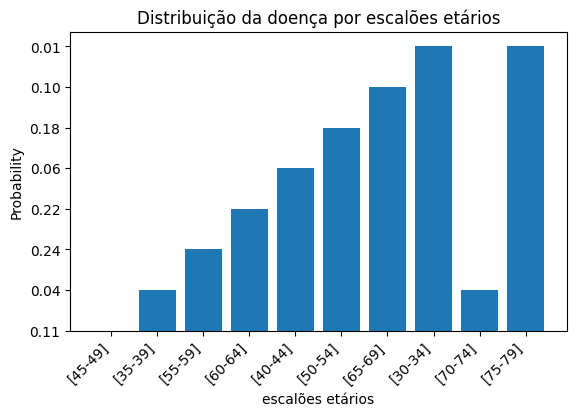

In [34]:
def agesFunc(d,haveDisease,haveDiseaseNumber):
    ages = dict()
    for i in haveDisease:
        age = int(d['idade'][i])
        unitAge = age % 10
        number = (age // 10) * 10
        #print("age=" + str(age), ", unitAge=" + str(unitAge) + ", number=" + str(number))
        if unitAge in [0,1,2,3,4]:
            init = age-unitAge
        else:
            init = number+5
        finit = init + 4
        #print("init=" + str(init) + ", finit=" + str(finit))
        rangeAge = "[" + str(init) + "-" + str(finit) + "]"
        if rangeAge not in ages.keys():
            newKey = dict()
            newKey = {rangeAge: 1}
            ages |= newKey
        else:
            ages[rangeAge] = ages[rangeAge] +1

    print(ages)

    for key in ages:
        ages[key] = format(ages[key]/haveDiseaseNumber , ".2f")
    
    createTable(ages)
    createGraph(ages,"Distribuição da doença por escalões etários", "escalões etários")

agesFunc(d,haveDisease,haveDiseaseNumber)


#### Crie uma função que calcula a distribuição da doença por níveis de colesterol. Considere um nível igual a um intervalo de 10 unidades, comece no limite inferior e crie os níveis necessários até abranger o limite superior

+-----------+--------------+
|   Range   | Distribution |
+-----------+--------------+
| [100-110] |     0.00     |
| [110-120] |     0.01     |
| [120-130] |     0.00     |
| [130-140] |     0.00     |
| [140-150] |     0.00     |
| [150-160] |     0.01     |
| [160-170] |     0.01     |
| [170-180] |     0.02     |
| [180-190] |     0.02     |
| [190-200] |     0.02     |
| [200-210] |     0.04     |
| [210-220] |     0.06     |
| [220-230] |     0.05     |
| [230-240] |     0.05     |
| [240-250] |     0.04     |
| [250-260] |     0.04     |
| [260-270] |     0.05     |
| [270-280] |     0.04     |
| [280-290] |     0.06     |
| [290-300] |     0.03     |
| [300-310] |     0.03     |
| [310-320] |     0.02     |
| [320-330] |     0.01     |
| [330-340] |     0.02     |
| [340-350] |     0.01     |
| [350-360] |     0.00     |
| [360-370] |     0.00     |
| [380-390] |     0.00     |
| [390-400] |     0.00     |
| [400-410] |     0.01     |
| [460-470] |     0.00     |
| [490-500] | 

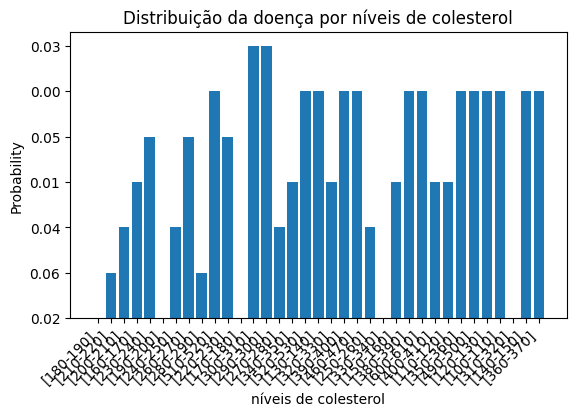

In [35]:
def colsFunc(d,haveDisease,haveDiseaseNumber):
    cols = dict()
    # cria à medida que for precisando, ou seja, se aparecer um número num range diferente, cria no momento esse range
    for i in haveDisease:
        col = int(d['colesterol'][i])
        if col > 0:
            unitCol = col % 10
            init = col-unitCol
            finit = init + 10
            rangeCol = "[" + str(init) + "-" + str(finit) + "]"
            if rangeCol not in cols.keys():
                newKey = dict()
                newKey = {rangeCol: 1}
                cols |= newKey
            else:
                cols[rangeCol] = cols[rangeCol] +1


    for key in cols:
        cols[key] = format(cols[key]/haveDiseaseNumber, ".2f")

    createTable(cols)
    createGraph(cols,"Distribuição da doença por níveis de colesterol", "níveis de colesterol")

colsFunc(d,haveDisease,haveDiseaseNumber)


#### Especifique um programa que ao executar apresenta as tabelas correspondentes às distribuições pedidas

In [36]:
def main():

   saida = -1
   while saida != 0:
         print("")
         print("1. Distribuição da doença por sexo")
         print("2. Distribuição da doença por escalões etários")
         print("3. Distribuição da doença por níveis de colesterol")
         print("4. Grafo da distribuição da doença por sexo")
         print("5. Grafo da distribuição da doença por escalões etários")
         print("6. Grafo da distribuição da doença por níveis de colesterol")

         saida = int(input("introduza a sua opção-> "))

         if saida == 0:
            print("saindo.......")
         elif saida == 1:
            sexFunc(d,haveDiseaseNumber)
         elif saida == 2:
            agesFunc(d,haveDisease,haveDiseaseNumber)
         elif saida == 3:
            colsFunc(d,haveDisease,haveDiseaseNumber)
         else:
            print("you didn't add anything")
         if saida != 0 :
            l = input("prima enter para continuar") 

         os.system('clear')

main()


1. Distribuição da doença por sexo
2. Distribuição da doença por escalões etários
3. Distribuição da doença por níveis de colesterol
4. Grafo da distribuição da doença por sexo
5. Grafo da distribuição da doença por escalões etários
6. Grafo da distribuição da doença por níveis de colesterol
saindo.......
